In [1]:
import numpy as np
import pandas as pd
import emoji
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Embedding

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('emoji_data.csv', header = None)
data.head()


,0,1
0,French macaroon is so tasty,4
1,work is horrible,3
2,I am upset,3
3,throw the ball,1
4,Good joke,2


In [3]:
data=data.dropna()

In [4]:
emoji_dict = {
    0: ":red_heart:",
    1: ":baseball:",
    2: ":grinning_face_with_big_eyes:",
    3: ":disappointed_face:",
    4: ":fork_and_knife_with_plate:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dict[label])

In [5]:
X = data[0].values
Y = data[1].values
X=np.delete(X,29)
Y=np.delete(Y,29)

# Embeddings

In [6]:
file = open('glove.6B.100d.txt', 'r', encoding = 'utf8')
content = file.readlines()
file.close()

# content

In [7]:
embeddings = {}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [8]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen



In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [10]:
Xtokens = tokenizer.texts_to_sequences(X)


In [11]:
maxlen = get_maxlen(Xtokens)
print(maxlen)

10


In [12]:
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [13]:
Ytrain = to_categorical(Y)

# Model

In [14]:
embed_size = 100
embedding_matrix = np.zeros((len(word2index)+1, embed_size))

for word, i in word2index.items():
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector

In [15]:
embedding_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.046539,  0.61966 ,  0.56647 , ..., -0.37616 , -0.032502,
         0.8062  ],
       [-0.49886 ,  0.76602 ,  0.89751 , ..., -0.41179 ,  0.40539 ,
         0.78504 ],
       ...,
       [-0.46263 ,  0.069864,  0.69095 , ..., -0.29174 ,  0.32041 ,
         0.21202 ],
       [ 0.073242,  0.11134 ,  0.62281 , ...,  0.53417 , -0.1646  ,
        -0.27516 ],
       [ 0.29019 ,  0.80497 ,  0.31187 , ..., -0.33603 ,  0.45998 ,
        -0.11278 ]])

In [16]:
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
             ),
    
    LSTM(units = 16, return_sequences = True),
    LSTM(units = 4),
    Dense(5, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history=model.fit(Xtrain, Ytrain, epochs = 100)

Epoch 1/100
6/6 [==============================] - 8s 14ms/step - loss: 1.5969 - accuracy: 0.2857
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.5714 - accuracy: 0.3462
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 1.5521 - accuracy: 0.3736
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 1.5341 - accuracy: 0.3956
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1.5181 - accuracy: 0.3901
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 1.5018 - accuracy: 0.3901
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 1.4818 - accuracy: 0.4121
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4591 - accuracy: 0.4396
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4355 - accuracy: 0.4560
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 1.4066 - accuracy: 0.4725
Epoch 11/100
6/6 [=

6/6 [==============================] - 0s 15ms/step - loss: 0.2408 - accuracy: 0.9780
Epoch 84/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2381 - accuracy: 0.9780
Epoch 85/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2359 - accuracy: 0.9780
Epoch 86/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2335 - accuracy: 0.9780
Epoch 87/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2314 - accuracy: 0.9780
Epoch 88/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2293 - accuracy: 0.9780
Epoch 89/100
6/6 [==============================] - 0s 17ms/step - loss: 0.2272 - accuracy: 0.9780
Epoch 90/100
6/6 [==============================] - 0s 17ms/step - loss: 0.2252 - accuracy: 0.9780
Epoch 91/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2233 - accuracy: 0.9780
Epoch 92/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2214 - accuracy: 0.9780
Epoch 93/100
6/6 [=====

In [45]:
test = ["I feel good", "I feel very bad", "lets eat dinner"]

test_seq = tokenizer.texts_to_sequences(test)
Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)

for i in range(len(test)):
    print(test[i], label_to_emoji(y_pred[i]))

I feel good 😃
I feel very bad 😞
lets eat dinner 🍽️


In [18]:
import tkinter
from tkinter import messagebox

In [20]:
def check(*args):
    
    test = [str(e1.get())]

    test_seq = tokenizer.texts_to_sequences(test)
    Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

    y_pred = model.predict(Xtest)
    y_pred = np.argmax(y_pred, axis = 1)

    for i in range(len(test)):
        outtext=test[i]+label_to_emoji(y_pred[i])
    messagebox.showinfo("Alert",outtext)

In [21]:
root=tkinter.Tk()
root.geometry("200x200")
e1=tkinter.Entry(root)
e1.grid(row=1,column=3)
b1=tkinter.Button(root,command=check,text="press")
b1.grid(row=2,column=3)
lab1=tkinter.Label(root)
lab1.grid(row=3,column=1)

root.mainloop()

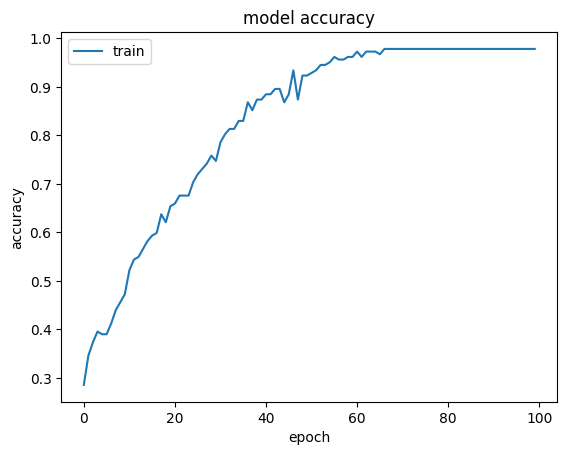

In [19]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

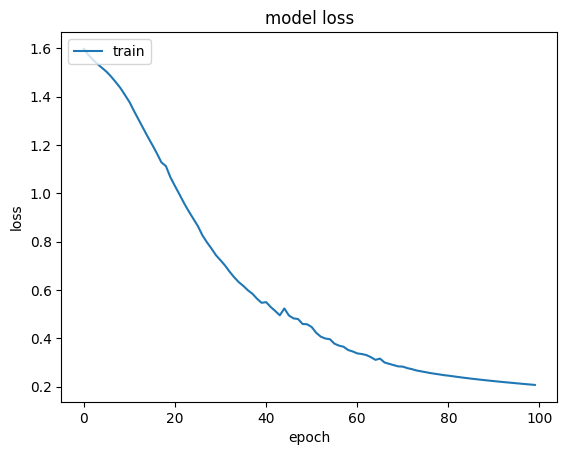

In [20]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()